In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:

print(df.info)
df.head()

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(df.describe())
df.info()

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data colu

In [5]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
#removing the cabin column and rows with two misssing values of embarked
df.drop(columns=["Cabin","Name","Ticket"], inplace=True)
df.dropna(subset=["Embarked"], inplace=True)

In [7]:
df.head()
df.tail()
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64


29.64209269662921 nan ModeResult(mode=nan, count=177)


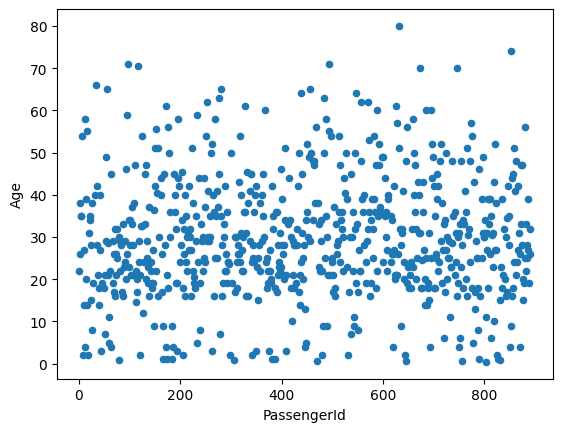

In [8]:
#Now comes age, there is 177 missing values , i believe age can be a deciding factor, so looking more into age column
g1 = df.plot.scatter(x="PassengerId", y= "Age")
from scipy import stats
a = np.mean(df["Age"])
b = np.median(df["Age"])
c= stats.mode(df["Age"])
print(a,b,c)

In [9]:
#there seems to be no relation with the order in which the data is given
#for now we will impute with the mean value
#we need to split the data into training and test data before imputation to decrase data leakeage
from sklearn.model_selection import train_test_split
#splitting into input and output
x=df.drop(columns="Survived")
y=df['Survived']

In [10]:
#splitting data to testtrain
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape,x_test.shape)
print(y_test.shape,y_train.shape)

print(y_train.isnull().sum())

(711, 8) (178, 8)
(178,) (711,)
0


In [11]:
m1 = x_train['Age'].mean()
m2 = x_test['Age'].mean()
print(m1,m2)

x_train['Age'].fillna(m1, inplace=True)
x_test['Age'].fillna(m2, inplace=True)


29.905744680851065 28.637364864864864


<ipython-input-11-6eec2e2f0913>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['Age'].fillna(m1, inplace=True)
<ipython-input-11-6eec2e2f0913>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.met

In [12]:
print(x_train.isnull().sum())
print(x_test.isnull().sum())

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [13]:
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

x_train.info()
x_test.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 708 to 103
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  711 non-null    int64  
 1   Pclass       711 non-null    int64  
 2   Age          711 non-null    float64
 3   SibSp        711 non-null    int64  
 4   Parch        711 non-null    int64  
 5   Fare         711 non-null    float64
 6   Sex_female   711 non-null    bool   
 7   Sex_male     711 non-null    bool   
 8   Embarked_C   711 non-null    bool   
 9   Embarked_Q   711 non-null    bool   
 10  Embarked_S   711 non-null    bool   
dtypes: bool(5), float64(2), int64(4)
memory usage: 42.4 KB
<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 281 to 10
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  178 non-null    int64  
 1   Pclass       178 non-null    int64  
 2   Age          178 n

In [14]:
print(x_train.isnull().sum())

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64


In [15]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [16]:
from sklearn.metrics import accuracy_score, classification_report
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)
print(accuracy_score(y_train, y_train_pred)) 
print(accuracy_score(y_test,y_test_pred))
print(classification_report(y_test, y_test_pred))
#probable overfitting

1.0
0.7303370786516854
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       109
           1       0.63      0.72      0.68        69

    accuracy                           0.73       178
   macro avg       0.72      0.73      0.72       178
weighted avg       0.74      0.73      0.73       178



In [17]:
df1 = pd.read_csv('/kaggle/input/titanic/test.csv')
df1.info()
df1.drop(columns=["Cabin","Name","Ticket"], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [18]:
print(df1.isnull().sum())

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


In [19]:
s1 = df1['Age'].mean()
s2 = df1['Fare'].mean()
print(s1,s2)

df1['Age'].fillna(s1, inplace=True)
df1['Fare'].fillna(s2, inplace=True)

30.272590361445783 35.627188489208635


<ipython-input-19-78213105aa45>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Age'].fillna(s1, inplace=True)
<ipython-input-19-78213105aa45>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method(

In [20]:
print(df1.isnull().sum())

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [21]:
x_pred = pd.get_dummies(df1)
#x_pred.info()
y_pred = clf.predict(x_pred)


In [22]:
print(y_pred)

[0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0
 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1
 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1
 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0
 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0
 1 0 0 0 1 0 0 1 0 0 1]


In [23]:
y_pred= pd.DataFrame(y_pred, columns=['Survived'])
sub = pd.concat([df1.PassengerId,y_pred], axis=1)
sub.set_index('PassengerId', inplace= True)
sub.to_csv(f"final.csv")